<a href="https://colab.research.google.com/github/akulkarni14/SDL-Practicals/blob/main/S%26DLPR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 237297216.0000
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 207231008.0000  
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 232837472.0000 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 228180576.0000 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 226014736.0000 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 224518592.0000 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 254893216.0000  
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 207260480.0000  
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 221776160.0000 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 250749664.0000 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 236592432.0000 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 241625984.0000 
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 256124432.0000 
Epoch 14/100
11/11 ━━━━━━━━━━━━

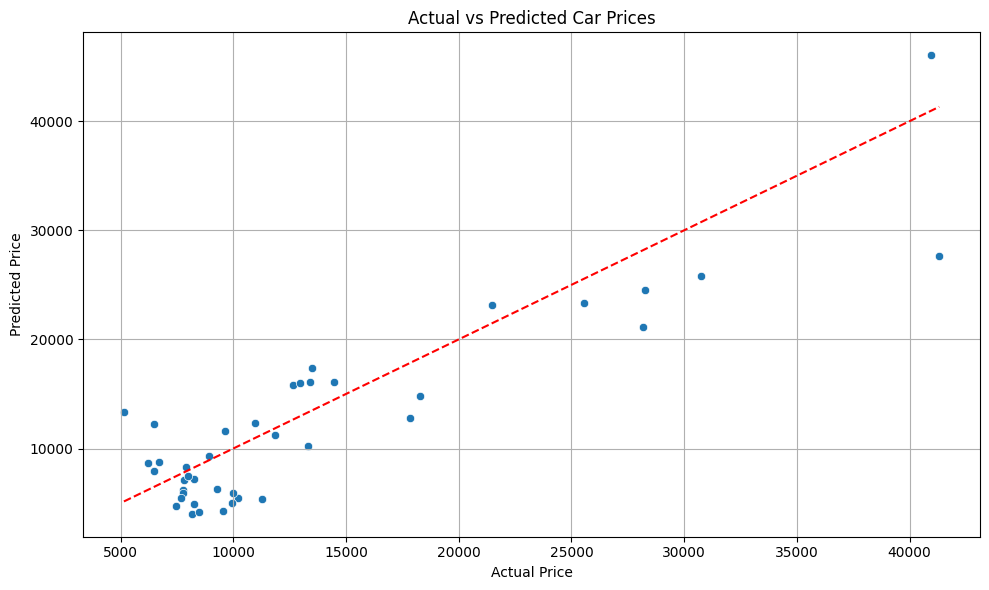


🔍 MSE Table (First 10 rows):
   Actual Price  Predicted Price        Error  Squared Error
0     30760.000     25823.710938  4936.289062   2.436695e+07
1     17859.167     12818.162109  5041.004891   2.541173e+07
2      9549.000      4288.517578  5260.482422   2.767268e+07
3     11850.000     11215.775391   634.224609   4.022409e+05
4     28248.000     24527.726562  3720.273438   1.384043e+07
5      7799.000      7130.674316   668.325684   4.466592e+05
6      7788.000      6227.299316  1560.700684   2.435787e+06
7      9258.000      6335.761719  2922.238281   8.539477e+06
8     10198.000      5484.405762  4713.594238   2.221797e+07
9      7775.000      5936.454102  1838.545898   3.380251e+06


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Drop unnecessary columns
df = df.drop(['car_ID', 'CarName'], axis=1)

# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1)

# Predict
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# -------------------------------
# Graph: Actual vs Predicted
# -------------------------------
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=comparison_df)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# MSE Table
# -------------------------------
comparison_df['Error'] = comparison_df['Actual Price'] - comparison_df['Predicted Price']
comparison_df['Squared Error'] = comparison_df['Error'] ** 2

print("\n🔍 MSE Table (First 10 rows):")
print(comparison_df.head(10))
